In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#### Summary of the process:

##### 1. Select a window centered on a pixel in the left image.
##### 2. Search for windows in the right image through a horizontal shift defined by the disparity range.
##### 3. Calculate the NCC for each shift.
##### 4. Keep the disparity (shift) for which the NCC is the highest.
##### 5. Move the window in the left image by one pixel and repeat the process for each pixel and each

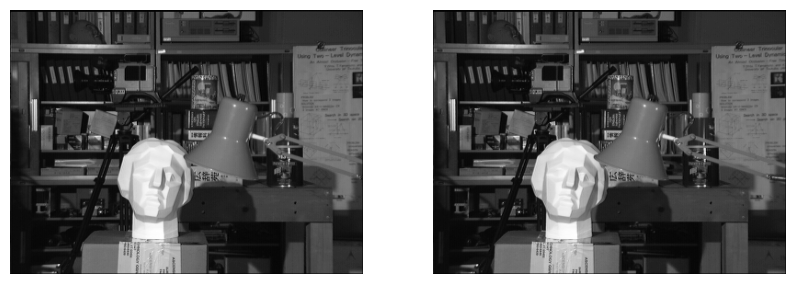

In [2]:
# Charger les images stéréo (image gauche et droite)
img_left = cv2.imread('imL.jpg', cv2.IMREAD_GRAYSCALE)
img_right = cv2.imread('imR.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_left, 'gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_right, 'gray')
plt.axis('off')
plt.show()

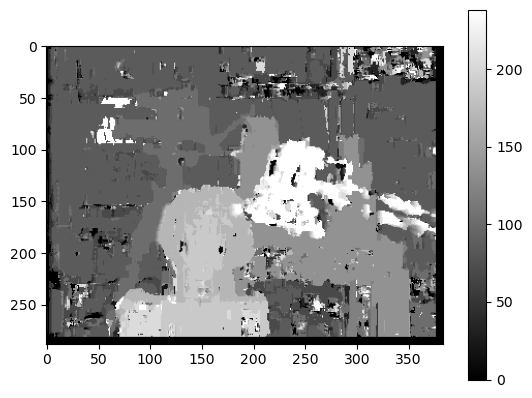

In [3]:
# Calculate Normalised Cross-Correlation
def calculate_NCC(window_left, window_right):
    # Calculate the mean of the left and right windows
    mean_left = np.mean(window_left)
    mean_right = np.mean(window_right)

    # Center the windows by subtracting the mean
    a = window_left - mean_left
    b = window_right - mean_right
    # Calculate the numerator of the NCC formula
    numerator = np.sum(a * b)
    # Calculate the denominator of the NCC formula
    denominator = np.sqrt(np.sum(a ** 2) * np.sum(b ** 2))

    if denominator == 0:
        ncc = 0
    else:
        ncc = numerator / denominator

    return ncc

# Calculate Disparity
def disparity_funct(image_left, image_right, window_size, disparity_range):
    height, width = image_left.shape
    disparity_map = np.zeros((height, width), np.float32) 

    # Iterate over each pixel in the left image
    for y in range(0, height - window_size):
        for x in range(0, width - window_size):
            best_ncc = -1  
            best_disparity = 0

            # Extract a window from the left image
            window_left = image_left[y:y+window_size, x:x+window_size]

            # Compare the left window with shifted windows in the right image within the disparity range
            for i in range(disparity_range):
                if x - i >= 0:  # S'assurer que l'on reste dans les limites de l'image droite
                    window_right = image_right[y:y+window_size, x-i:x-i+window_size]
                    # Calculate the NCC value between the current left and right windows
                    ncc_value = calculate_NCC(window_left, window_right)

                    # Update the best disparity if the current NCC value is higher
                    if ncc_value > best_ncc:
                        best_ncc = ncc_value
                        best_disparity = i

             
            disparity_map[y, x] = best_disparity

    # Normalize the disparity map  
    disparity_map = (disparity_map / disparity_range) * 255
    return disparity_map.astype(np.uint8)



# Calculate the disparity map using the left and right images, a window size of 7, and a disparity range of 15
disparity_map = disparity_funct(img_left, img_right, window_size=7, disparity_range=15)

# Afficher la carte de disparité
plt.imshow(disparity_map, cmap='gray')
plt.colorbar()
plt.show()
